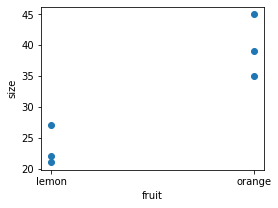

In [1]:
# Workshop 1 : Decision Tree อย่างง่าย
# ข้อมูลที่จะนำไป Train ให้คอม เรียนรู้
# [size] ไม่จำเป็นต้องเรียงขนาด
X = [[27], # คือ Features หรือคุณลักษณะเด่น(เมทริกซ์)
     [35],
     [39],
     [21],
     [22],
     [45]]

y_names = ['lemon','orange','orange','lemon','lemon','orange']
y = [0,1,1,0,0,1] # y คือ Class / Target / Label or Output

import matplotlib.pyplot as plt
#matplotlib inline
plt.figure(figsize=(4,3))

plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names,X) # พล็อต Scatter ดูจุดข้อมูล
plt.show()

#นำข้อมูลมา Train สร้าง Model
#โปรแกรมเบื้องหลัง
#if(size<=30):
#    fruit = 'lemon'
#else:
#    fruit = 'orange'


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                      splitter='best')

In [12]:
# สอนให้คอมพิวเตอร์เรียนรู้
from sklearn.tree import DecisionTreeClassifier # import library
model = DecisionTreeClassifier() # เริ่ม Model (Instantiate)

# ให้ทำการเรียนรู้จากข้อมูล X (size) and y(fruit types) ที่กำหนดไว้ก่อนหน้านี้
model.fit(X,y)

# การทำนาย
# กำหนดค่าภายใน [[]] เพื่อทำให้เป็นเมทริกซ์ รูปแบบเหมือนกับค่า X ในการ Train
data = [[25]] # ขนาดผลไม้ผลหนึ่ง (New input data = 25)
y_predict = model.predict(data) # ทำนาย
print('Result =', y_predict[0]) # แสดงผลลัพธ์

#if y_predict[0] == 0 : # 0 คือ lemon
#    push_to_lemon_basket() # บรรจุใส่ตะกร้ามะนาว
#else:
#    push_to_orange_basket() # บรรจุใส่ตะกร้าส้ม

class_names = ['lemon','orange']

# ทดลองทำนายหรือตรวจจับใหม่
data = [[25]]
y_predict = model.predict(data)
prd = class_names[y_predict[0]]
print('Result : {}'.format(prd)) #ผลลัพธ์ที่บอกชนิดผลไม้ตรงๆ

# ลองเปลี่ยนค่า
data = [[32]]
y_predict = model.predict(data)
prd = class_names[y_predict[0]]
print('Result : {}'.format(prd)) #ผลลัพธ์ที่บอกชนิดผลไม้ตรงๆ

# ลองทำนายพร้อมๆกันหลายๆค่า
data = [[32],
       [25],
       [21],
       [38]]
y_predict = model.predict(data)
print('Result : ') #ผลลัพธ์ที่บอกชนิดผลไม้ตรงๆ
for i in y_predict:
    print(class_names[i])

Result = 0
Result : lemon
Result : orange
Result : 
orange
lemon
lemon
orange


การใช้งานระบบโดยรวม

 import library
 สร้าง หรือ โหลด moodel
 วนรอบอ่านขนาดจากเซ็นเซอร์ แล้วทำนาย และ คัดแยก
 while True:
    # input อ่านจะระบบเซ็นเซอร์
    size = eval(input("Size:")) #ป้อนค่าตัวเลข สมมุติว่าอ่านขนาดจากเซ็นเซอร์หรือกล้อง
    data = [size]
    y_predict = model.predict([data])
    result = class_names[y_predict[0]]
    print(result)
    #ตรวจสอบและคัดแยก ถ้าเป็น lemon ให้ผลักเข้าตะกร้า Lemon
    if (result == 'lemon'):
        # push system
        print('<--- Push to Lemon Basket')
    else:
        # push system ตรวจสอบและตัดแยก ถ้าเป็น orange ให้ผลักเข้าตะกร้า Orange
        print('Push to Orange Basket --->')
 print('done')
 

In [1]:
# การติดตั้งไลบรารีแสดง Decision Tree
# anaconda prompt > conda install -c conda=forge python-graphviz #Window

In [6]:
# graphviz-test.ipynb
import graphviz
dot = graphviz.Digraph(comment='The Round Table')
dot.node('A','King Arthur') # node หลัก (root)
dot.node('B','Sir Bedevere the Wise') # node ย่อย
dot.node('L','Sir Lancelot the Brave') # node ย่อย
dot.edges(['AB','AL']) # เส้นเชื่อม (edges A->B และ A->L)
dot.edge('B','L', constraint='false') # เส้นเชื่อม (edges B->L)

dot.render('graph', view=True) # บันทึกเก็บลงไฟล์ pdf

'graph.pdf'

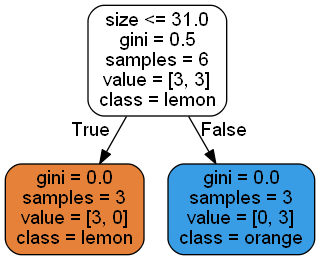

In [14]:
#Workshop 2 : แสดง Tree ของ Model

# โค้ดต่างๆ ต่อจาก Workshop 1
#model #ตรวจสอบmodel

#สร้าง Tree Diagram จาก model
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = ['size'] # ชื่อ features ที่จะปรากฎในแต่ละช่องของไดอะแกรม
fruit_types = ['lemon','orange'] # ชื่อ class ที่จะคัดแยก 0 = lemon / 1 =orange

# สร้างข้อมูล dot_data จากตัวแปร model (ข้อมูลนี้จะนำไปplot graph)
dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=fruit_types,
                          filled=True,
                          rounded=True)
# สร้างไดอะแกรม จากข้อมูล dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-fruit1.png') # save diagram file 
Image(graph.create_png()) # display diagram

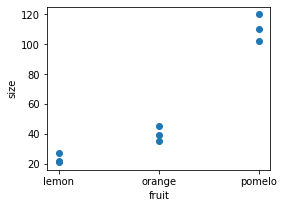

In [15]:
# Workshop 3 : เพิ่ม Class
X = [[27],
     [35],
     [39],
     [21],
     [22],
     [45],
     [102],
     [110],
     [120]]
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']
y = [0 , 1, 1, 0, 0, 1, 2, 2, 2]
# ลพล็อตดูกลุ่มข้อมูล
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names,X)
plt.show()

Result : lemon
Result : orange
Result : pomelo


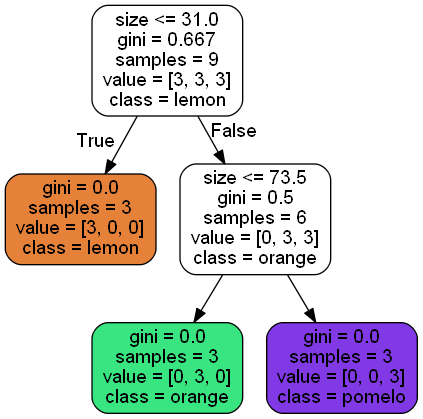

In [20]:
# import ค่าต่างๆแบบ workshop 1
from sklearn.tree import DecisionTreeClassifier # import library
model = DecisionTreeClassifier() # เริ่ม Model (Instantiate)
model.fit(X,y) # ให้ทำการเรียนรู้จากข้อมูล X (size) y(fruit types)

# ทำนาย
class_names = ['lemon','orange','pomelo'] # 0 1 2
data = [[25]] # ขนาดที่จะให้ระบบแยกว่าคืออะไร (test)
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

data = [[43]]
y_predict = model.predict(data)
prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

data = [[104]]
y_predict = model.predict(data)
prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

#สร้างไดอะแกรม
data_feature_names = ['size']
fruit_types = ['lemon','orange','pomelo'] # 0 = lemon 1 = orange 2 = pomelo

import pydotplus
from IPython.display import Image
dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=fruit_types,
                          filled=True,
                          rounded=True)
# สร้างไดอะแกรม จากข้อมูล dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-fruit2.png') # save diagram file 
Image(graph.create_png()) # display diagram

การเข้ารหัส

In [3]:
X = [[27],
     [35],
     [39],
     [21],
     [22],
     [45],
     [102],
     [110],
     [120]]
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']

#ทำการเปลี่ยนหรือแปลง ข้อความเป็นรหัสตัวเลข เรียกว่า Label Encoding
y = [0,1,1,0,0,1,2,2,2]


ปัญหาวิธีนี้คือเสียเวลานานและโอกาสเกิดข้อผิดพลาดสูง โดยเฉพาะอย่างยิ่งหากมีจำนวน
ข้อมูลมากๆ ยิ่งถ้ามีจำนวน Class มากๆจะทำให้เสียเวลาและเกิดความผิดพลาดสูง
สามารถแก้ไขได้ 2 วิธี
1. Pandas ใช้ factorize
2. Scikit-learn ใช้ LabelEncode

In [4]:
# 2.Scikit-learn ใช้ LabelEncode
from sklearn.preprocessing import LabelEncoder

y_le = LabelEncoder()
y = y_le.fit_transform(y_names)
y
# y = [0,1,1,0,0,1,2,2,2] เทียบที่เราทำเอง

array([0, 1, 1, 0, 0, 1, 2, 2, 2], dtype=int64)

In [6]:
#เก็บ array y ในรูปแบบ list
class_names = list(y_le.classes_)
class_names

['lemon', 'orange', 'pomelo']

ภาพรวมการรัน 1 ครั้งที่ใช้ การ LabelEncorder เข้าด้วย

all class: ['lemon', 'orange', 'pomelo']
Result:
orange
lemon
orange
pomelo


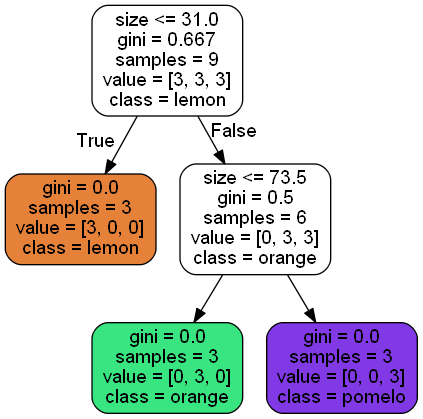

In [36]:
#การ import library
from sklearn.tree import DecisionTreeClassifier # ต้นไม้ติดสินใจ
from sklearn.preprocessing import LabelEncoder # แปลง string เป็นเลขเข้ารหัส

#ข้อมูล input ป้อนเข้าใช้ train
X = [[27],
     [35],
     [39],
     [21],
     [22],
     [45],
     [102],
     [110],
     [120]]

# ข้อมูล output หรือ label ยังไม่ได้ทำ dataEncoder
y_names = ['lemon','orange','orange','lemon','lemon','orange','pomelo','pomelo','pomelo']

# Data Label Encoder
y_le = LabelEncoder()
y = y_le.fit_transform(y_names)

class_names = list(y_le.classes_) # แปลงเป็น list ข้อมูล class names หรือ ชนิดผลไม้
print('all class: {}'.format(class_names))

#สร้าง model แล้ว train
model = DecisionTreeClassifier()
model.fit(X,y)

data = [[32],[25],[70],[125]] # ทดสอบการทำนาย
y_predict = model.predict(data)
print('Result:')
for k in y_predict:
    print(class_names[k])
    
# หากต้องการแสดงไดอะแกรม Tree ใช้โค้ดดังนี้
data_feature_names = ['size']
fruit_types = class_names # ใช้ค่าจากโค้ด(ไม่ต้องกำหนดเองแล้ว)

import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names=fruit_types,
                          filled=True,
                          rounded=True)
# สร้างไดอะแกรม จากข้อมูล dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-fruit3.png') # save diagram file 
Image(graph.create_png()) # display diagram

Result : yes


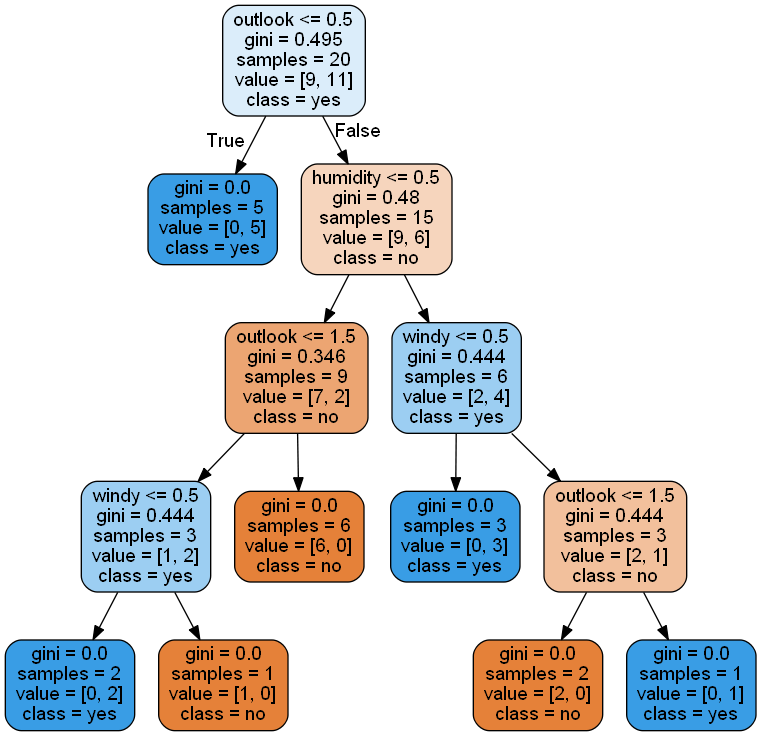

In [11]:
import pandas as pd
df = pd.read_csv('playtennis.csv')
df.head()
df.dtypes  
df.play.unique()
df.isnull().sum()
X = df.iloc[:,:-1]   
X
y = df.play
y
from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier()
#model.fit(X, y)

from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb

columns = ['outlook','temp','humidity','windy']
labelEncode(df, columns)
df

y_le = LabelEncoder()
y = y_le.fit_transform(df.play)
df['play_'] = y
df
X = df[['outlook_','temp_','humidity_', 'windy_']]  # or X = df.iloc[:,5:-1]
X[:5]

# ทำการ Train
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
#ลองทำนายโดยป้อน inputเป็น [1,2,0,0]
class_names = list(y_le.classes_) # class names
class_names

data= [[1,2,0,0]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

#สร้างไดอะแกรม Model

data_feature_names = 'outlook','temp','humidity','windy'
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None,
                          feature_names=data_feature_names,
                          class_names = class_names,
                          filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data) # สร้างไดอะแกรม
Image(graph.create_png())

#Workshop 5 : การประเมิน Model
ปกติก่อนนำ model ไปใช้งานจะต้องทำการ Test ประเมินความแม่นยำว่ามีกี่ % ก่อนยอมรับได้หรือไม่

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#แบ่ง 20% ไว้ Test ด้วย split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 0.2 = 20%

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Train model (ใช้ X_train,y_train)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
# ทำการ Test
y_predict = model.predict(X_test)
y_predict

Total X: 20
Total train: 16
Total test: 4


array([0, 0, 0, 0])

In [24]:
y_test
#คำนวณความแม่นยำ

print('Accuracy : {}'.format(accuracy_score(y_test,y_predict)*100))
#หมายเหตุแต่ละครั้งจะได้ไม่เท่ากัน เนื่องจาก split มาแต่ละครั้งไม่เหมือนกัน

Accuracy : 75.0


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
import torch
print(torch.Tensor([1,2])) # ได้ tensor([1., 2.])


tensor([1., 2.])
